<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Linear_regression_and_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
medical_charges_url='https://github.com/JovianML/opendatasets/blob/master/data/medical-charges.csv'

In [21]:
from urllib.request import urlretrieve

In [22]:
urlretrieve(medical_charges_url,'medical-charges.csv')

('medical-charges.csv', <http.client.HTTPMessage at 0x7f159ec4ec50>)

In [23]:
import pandas as pd


In [26]:
medical_df = pd.read_csv('medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Exploratory Analysis and  Visulation

In [30]:
import plotly.express as pt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(20,4)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [34]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [36]:
fig=pt.histogram(medical_df,
                 x='age',
                 marginal='box',
                 nbins=47,
                 title='Distribition of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [41]:
fig= pt.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI(Body Mass Index)' )
fig.update_layout(bargap=0.1)
fig.show()

In [55]:
fig = pt.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='smoker',
                 color_discrete_sequence=['green','grey'],
                 title='Annual Medical Charges' )
fig.update_layout(bargap=0.1)
fig.show( )

In [56]:
fig = pt.histogram(medical_df,
                 x='sex',
                 marginal='box',
                 color='region',
                 color_discrete_sequence=['green','grey'],
                 title='Annual Medical Charges' )
fig.update_layout(bargap=0.1)
fig.show( )

In [57]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [58]:
pt.histogram(medical_df,x='smoker',color='sex',title='smoker')

In [ ]:
 #Visualize the relationship between 'age ' and 'charges

In [61]:
fig =pt.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [62]:
fig =pt.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [63]:
pt.scatter(medical_df,x='children',y='charges')

In [64]:
pt.violin(medical_df,x='children',y='charges')

In [ ]:
#Correlation

In [65]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [66]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [68]:
smoker_values={'no': 0,'yes': 1}
smoker_numeric =medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [70]:
pt.scatter(medical_df,x='age',y='age')

In [71]:
pt.scatter(medical_df,x='age',y='children')

In [69]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


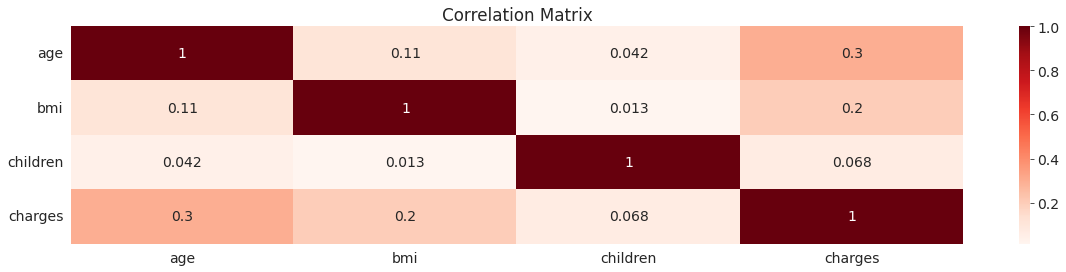

In [72]:
sns.heatmap(medical_df.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix');

In [ ]:
# Linear Regression using single Feature

In [73]:
non_smoker_df=medical_df[medical_df.smoker=='no']

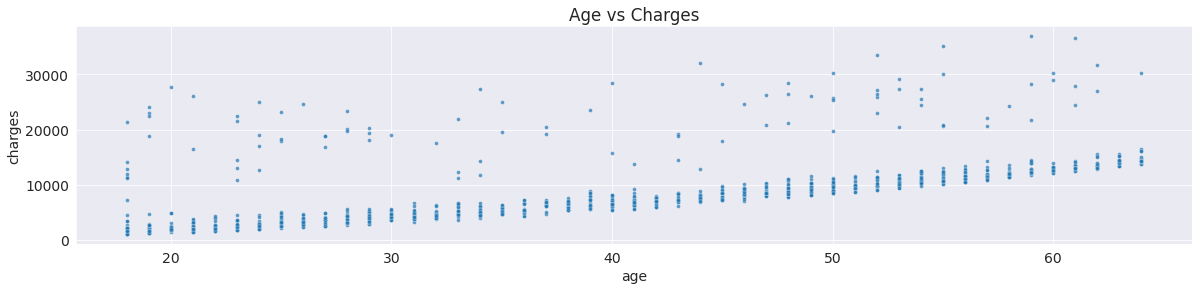

In [74]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)